<a href="https://colab.research.google.com/github/Norberto27/Norberto_ProcDelHabla/blob/main/NRMU_T2_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. TÍTULO Y DATOS**

#**Título: TEMA 2 - Clasificación - Martín Fierro y Fausto**

**Opcion 2**

#**2. Autor**

##**Desarrollador: Norberto Raul Martearena Urquiza**

##**Legajo: 11099**

##**Fecha: 20/12/2024**


#**INTRODUCCION**

El objetivo de este notebook es entrenar un modelo de clasificación que sea capaz de determinar si un verso o estrofa pertenece a Martín Fierro o a Fausto (Estanislao López),

utilizando técnicas de procesamiento de lenguaje natural (PLN) y modelos de aprendizaje automático.

#**Librerías y Funciones Principales**

Como inicio, voy a instalar las librerias que en principio voy a utilizar y luego ire incorporando otras a medida que sean requeridas

**sentence-transformers**

*Descripción:* Librería para generar representaciones numéricas (embeddings) de oraciones o textos, útil en tareas de similitud semántica, búsqueda y clustering.

*Funciones principales:*

SentenceTransformer(model_name): Carga un modelo preentrenado.

encode(sentences): Convierte oraciones a vectores de alta dimensionalidad.

util.pytorch_cos_sim(vec1, vec2): Calcula la similitud coseno entre embeddings.

**PyPDF2**

*Descripción:* Librería para manipular archivos PDF: lectura, extracción de texto, fusión, división, etc.

*Funciones principales:*

PdfReader(file): Abre un archivo PDF para lectura.
reader.pages: Accede a las páginas del PDF.

page.extract_text(): Extrae el texto de una página.

PdfWriter: Crea un nuevo archivo PDF o modifica uno existente.

**matplotlib**

*Descripción:* Librería para crear visualizaciones en 2D, como gráficos de líneas, barras, histogramas y más.

*Funciones principales:*

pyplot.plot(x, y): Crea un gráfico de líneas.

pyplot.bar(x, y): Genera un gráfico de barras.

pyplot.scatter(x, y): Crea un gráfico de dispersión.

pyplot.show(): Muestra el gráfico.



In [ ]:
!pip install sentence-transformers PyPDF2 matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.1 MB/s eta 0:00:00


Bajo una libreria que me permite trabajar con lenguaje natural. Proporciona modulos que permiten:

Tokenización: Dividir el texto en palabras (tokens) o en oraciones.

Lematización y stemming: Normalizar palabras para encontrar su forma base
Entre Otros


punkt: Es un modelo de tokenización incorporado en NLTK. Su función principal es identificar los límites de las oraciones y dividir un texto en oraciones o palabras sin requerir un modelo de entrenamiento externo.

In [ ]:
!pip install --upgrade nltk
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import os
print(os.listdir(nltk.data.find("tokenizers")))


['punkt.zip', 'punkt']


Procedo a la carga del martin Fierro

In [ ]:
# Función actualizada para limpiar y dividir en versos
from PyPDF2 import PdfReader
import re
import requests

def limpiar_y_dividir_en_versos(texto):
    inicio_poema = "Aquí me pongo a cantar"
    if inicio_poema in texto:
        texto = texto.split(inicio_poema, 1)[1]
        texto = inicio_poema + texto  # Asegurar que comienza correctamente

    # Limpieza del texto
    texto = re.sub(r'Recursos de dominio público.*?Página \d+', '', texto, flags=re.DOTALL)
    texto = re.sub(r'El gaucho Martín Fierro', '', texto, flags=re.IGNORECASE)
    texto = re.sub(r'José Hernández', '', texto, flags=re.IGNORECASE)
    texto = re.sub(r'Imágenes de dominio público.*', '', texto, flags=re.DOTALL)
    texto = re.sub(r'\b(I|II|III|IV|V|VI|VII|VIII|IX|X|XI|XII|XIII)\b', '', texto)
    texto = re.sub(r'\b(página|Página)\b.*?\d+', '', texto)
    texto = re.sub(r'\n+', '\n', texto).strip()

    # Dividir en versos individuales
    versos = [linea.strip() for linea in texto.split("\n") if linea.strip()]
    return versos

# Descargar y leer el poema
url = "https://www.argentina.gob.ar/sites/default/files/hernandez_jose_-_el_gaucho_martin_fierro.pdf"
response = requests.get(url)

# Guardar el PDF
with open("martin_fierro.pdf", "wb") as f:
    f.write(response.content)

# Procesar el texo
# aqui extraemos el texto, convierte todo el textoen una lista de cadenas de cada pagina
# con join, combinamos estas cadenas en una unica cadena
reader_mf = PdfReader("martin_fierro.pdf")
texto_mf = " ".join([page.extract_text() for page in reader_mf.pages])
#limpiamos el texto y dividimos el texto en versos
versos_mf = limpiar_y_dividir_en_versos(texto_mf)

# Imprimir algunos versos para verificar
print("Primeros versos del Martín Fierro:")
for i, verso in enumerate(versos_mf[:5]):
    print(f"Verso {i+1}: {verso}")


Primeros versos del Martín Fierro:
Verso 1: Aquí me pongo a cantar
Verso 2: al compás de la vigüela,
Verso 3: que el hombre que lo desvela
Verso 4: una pena estrordinaria,
Verso 5: como la ave solitaria


cargo en el notebook, el otro texto (Fausto en este caso), cargado en mi computadora previamente desde el link  https://www.cervantesvirtual.com/obra/fausto-seguido-de-poesias-completas/

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving faustoPoesiasCompletas.pdf to faustoPoesiasCompletas.pdf


In [ ]:
# Función actualizada para limpiar y dividir en versos
def limpiar_y_dividir_en_versos_fausto(texto):
    texto = re.sub(r"Estanislao.*?López", "", texto, flags=re.IGNORECASE)
    texto = re.sub(r'\b(página|Página)\b.*?\d+', '', texto)
    texto = re.sub(r'\n+', '\n', texto).strip()

    # Dividir en versos individuales
    versos = [linea.strip() for linea in texto.split("\n") if linea.strip()]
    return versos

# Leer y procesar el texto
reader_fausto = PdfReader("faustoPoesiasCompletas.pdf")
texto_fausto = " ".join([page.extract_text() for page in reader_fausto.pages[12:]])
texto_fausto_truncado = texto_fausto.split("En sanguinarios excesos, Por mal entendido honor")[0]
versos_fausto = limpiar_y_dividir_en_versos_fausto(texto_fausto_truncado)

# Imprimir algunos versos para verificar
print("Primeros versos del Fausto:")
for i, verso in enumerate(versos_fausto[:5]):
    print(f"Verso {i+1}: {verso}")


Primeros versos del Fausto:
Verso 1: FAUSTO 43
Verso 2: Paisano Aniceto el Callo,
Verso 3: Puede sin cuidao vivir,
Verso 4: Que primero han de decir
Verso 5: Que la viscacha es caballo,


Unificación y Preparación para el Siguiente Paso
Etiquetar los versos con la obra correspondiente:

Martín Fierro: label = 0
Fausto: label = 1
Crear un DataFrame para combinar los datos:

Ademas en forma simple, unimos los dataframe y los barajamos:

pd.concat([df_mf, df_fausto]): Une los DataFrames df_mf y df_fausto en uno solo, apilando sus filas.

.sample(frac=1): Baraja aleatoriamente todas las filas del DataFrame resultante.

.reset_index(drop=True): Reinicia los índices del DataFrame, eliminando los índices antiguos y asignando un índice nuevo consecutivo (0, 1, 2...).

Resultado final: data es un DataFrame combinado de df_mf y df_fausto, con las filas mezcladas y los índices reorganizados.

Luego:

implemento una lineas con sentencias que limpian y normalizan los datos textuales:

Elimina contenido irrelevante como líneas vacías, números romanos, títulos o números de página.

Garantiza que los versos estén bien formateados y listos para análisis posterior, como procesamiento de lenguaje natural o visualización.

In [ ]:
import pandas as pd

# Crear DataFrame con etiquetas
df_mf = pd.DataFrame({'verse': versos_mf, 'label': 0})
df_fausto = pd.DataFrame({'verse': versos_fausto, 'label': 1})

# Combinar y mezclar aleatoriamente con semilla
data = pd.concat([df_mf, df_fausto]).sample(frac=1, random_state=42).reset_index(drop=True)
# data = pd.concat([df_mf, df_fausto]).sample(frac=1).reset_index(drop=True)

import re

# 1. Eliminar líneas vacías o demasiado cortas
data = data[data['verse'].str.strip().str.len() > 3]

# 2. Eliminar números romanos
data = data[~data['verse'].str.contains(r'^\b[IVX]+\b$', flags=re.IGNORECASE)]

# 3. Eliminar títulos y números de página
data = data[~data['verse'].str.contains(r'\bFAUSTO\b.*\d+', flags=re.IGNORECASE)]

# 4. Normalizar espacios dentro de las palabras
data['verse'] = data['verse'].str.replace(r'\s+', ' ', regex=True).str.strip()

# 5. Verificar limpieza de los datos
print(data.sample(10))

# 6. Verificar distribución de las etiquetas
print(data['label'].value_counts())

# 7. Guardar los datos limpios
# data.to_csv('data_limpio.csv', index=False)



# Guardar en archivo CSV para uso posterior
data.to_csv("versos_clasificacion.csv", index=False, encoding='utf-8')
print("Datos preparados y guardados para clasificación.")


                                 verse  label
6029       Ciertas persianas, se para,      1
109         Media vuelta a la derecha,      1
1130          pues a mí me pasa igual,      0
5931              un planaso le asenté      0
4127   _ ¿ Y su ausencia de tres días?      1
2177            nunca nos ha de faltar      0
494          "-Este sí que es amolar",      0
6506            es siguro que lo deja.      0
3326  Evocación, el muerto se levanta.      1
2860           Por mal entendido honor      1
label
1    4314
0    2317
Name: count, dtype: int64
Datos preparados y guardados para clasificación.


In [ ]:
print(df_mf)

                             verse  label
0           Aquí me pongo a cantar      0
1         al compás de la vigüela,      0
2     que el hombre que lo desvela      0
3          una pena estrordinaria,      0
4            como la ave solitaria      0
...                            ...    ...
2312      en el Dios que lo formó;      0
2313         y aquí me despido yo,      0
2314     que referí ansí a mi modo      0
2315       MALES QUE CONOCEN TODOS      0
2316        PERO QUE NAIDES CONTO.      0

[2317 rows x 2 columns]


In [ ]:
print(df_fausto)

                                  verse  label
0                             FAUSTO 43      1
1             Paisano Aniceto el Callo,      1
2               Puede sin cuidao vivir,      1
3              Que primero han de decir      1
4           Que la viscacha es caballo,      1
...                                 ...    ...
4334                  C asa de M uñecas      1
4335                    ENRIQUE LARRETA      1
4336                       El “Linyera"      1
4337        Santa M aría del Buen A ire      1
4338  Las dos Fundaciones de Ba. A ires      1

[4339 rows x 2 columns]


#**Este bloque esta solo para el caso que se desee obviar la generacion del dataset depurado "versos_clasificacion.csv" y se desee procesar desde este punto recuperando del disco local**


In [ ]:
data = load("versos_clasificacion.csv")

Verifico las 5 primeras filas del nuevo dataset barajado

In [ ]:
print(data[:5])

                                       verse  label
0                  De las cifras anteriores,      1
1                       ¡cosa que daba calor      0
2                     Apenas hiere la arena.      1
3  Hasta el triste peñasco en que expiraste!      1
4              de aquel maula, que me errase      0


#**verifico si los datos están correctamente preparados:**

Verificar la distribución de etiquetas: Ejecuto el siguiente código para asegurarme de que tanto los versos del Martín Fierro como los del Fausto están presentes en el dataframe:

In [ ]:
print(data['label'].value_counts())


label
1    4314
0    2317
Name: count, dtype: int64


Verificar ejemplos de ambas clases: Filtro los datos por etiqueta para asegurarme de que ambas clases están representadas correctamente:

In [ ]:
print(data[data['label'] == 0].head())  # Versos del Martín Fierro
print(data[data['label'] == 1].head())  # Versos del Fausto


                            verse  label
1            ¡cosa que daba calor      0
4   de aquel maula, que me errase      0
5          mazamorra bien pisada,      0
7    y aquél que no era chancleta      0
10      y que eran muchos jinetes      0
                                       verse  label
0                  De las cifras anteriores,      1
2                     Apenas hiere la arena.      1
3  Hasta el triste peñasco en que expiraste!      1
6          Le soltara furioso mi intendente.      1
8       Será lo que una oruga es a un alano,      1


Confirmar el barajado: Para verificar que las filas estén mezcladas, voy a revisar algunas filas de forma aleatoria:

In [ ]:
print(data.sample(10))


                               verse  label
6109     A enderezarle esta epístola      1
4611    • —¡Si la han informado mal!      1
218       Del vate, cantar llorando,      1
5552  Y se hacen los que no aciertan      0
2983        Juana, Rosa y Saturnina.      1
4842               J. J. D E MO,°.A.      1
2781                SALAS Y QUIROGA.      1
1298    Y aunque a las aves les dio,      0
4807   que yo era un hombre decente,      0
11             Y elevan sus palmeras      1


#**Representar los datos con Bag of Words o TF-IDF**

A esta altura, yo debo transformar los textos en vectores con caracteristicas numericas.

para ello contamos con dos tecnicas Bag of Words (BoW) o TF-IDF utilizadas en procesamiento del lenguaje natural (NLP) para convertir texto en un formato numérico que pueda ser entendido y procesado por algoritmos de aprendizaje automático.

Bag of Words (BoW)

El modelo Bag of Words convierte un conjunto de textos (como documentos o frases) en un conjunto de vectores basado en la frecuencia de las palabras que aparecen en el texto.

No considera el orden de las palabras, de ahí el término "bolsa de palabras". Solo importa qué palabras están presentes y con qué frecuencia.

Vocabulario:  se identifican todas las palabras únicas (o "tokens") que aparecen en el conjunto de datos, con lo que se forma un "vocabulario" de las palabras posibles.

Vectorizacion: Para cada documento o texto, se crea un vector con tantas dimensiones como palabras hay en el vocabulario. Cada dimensión representa la frecuencia (o conteo) de una palabra en ese documento.

TF-IDF

es una mejora del modelo Bag of Words,  ademas de la frecuencia de las palabras en un documento, considera, también su relevancia. Penaliza las palabras comunes que aparecen en muchos documentos (como "el", "y", "es")

Combina dos métricas:
TF (Term Frequency): La frecuencia de una palabra en un documento específico.
IDF (Inverse Document Frequency): Una medida de qué tan rara es una palabra en el conjunto de documentos.

Porque eleji TF-IDF:

Se justifica en tareas complejas donde es fundamental identificar términos relevantes para la discriminación entre documentos, como en la clasificación de documentos.

Bag of Words, en cambio, es ideal para tareas simples de NLP o cuando se necesita una representación básica del texto (como análisis de sentimientos rápido o clasificación simple).


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Se utiliza TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Limita a las 1000 palabras más comunes
X = vectorizer.fit_transform(data['verse'])
y = data['label']


# Verificar la dimensionalidad de los datos transformados
print(f"Shape de X: {X.shape}")


Shape de X: (6631, 1000)


Interpretacion del resultado anterior

Tengo una matriz TF-IDF de 6,631 documentos con un vocabulario reducido a las 1,000 palabras más importantes.
Cada documento está representado como un vector de 1,000 dimensiones, donde cada entrada indica la importancia de una palabra en ese documento en función de su frecuencia relativa y su relevancia global.

Dividir en conjuntos de entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar el tamaño de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (4641, 1000)
Tamaño del conjunto de prueba: (1990, 1000)


Entrenar el clasificador Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Entrenar modelo
model = MultinomialNB()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.78      0.48      0.60       725
           1       0.76      0.92      0.83      1265

    accuracy                           0.76      1990
   macro avg       0.77      0.70      0.71      1990
weighted avg       0.77      0.76      0.75      1990



Interpretacion de los resultados y ajustes probables.

Voy a analizar las métricas claves y ajustar si es necesario.

Interpretación del reporte de clasificación

El reporte de clasificación proporciona métricas clave sobre el rendimiento del modelo en la tarea de clasificación binaria, es decir, decidir si un verso pertenece al Martín Fierro (clase 0) o al Fausto (clase 1). Estas métricas permiten evaluar cómo de bien está funcionando el clasificador Naive Bayes en este problema específico.


#**Interpretacion en el contexto del tema 2 de clasificacion**

Métricas importantes

Precision

Clase 0 (Martín Fierro): 0.78

De todos los versos clasificados como del Martín Fierro, el 78% realmente lo eran.

Clase 1 (Fausto): 076

De todos los versos clasificados como del Fausto, el 76% eran correctos.

Esto indica que el modelo es ligeramente más preciso al clasificar versos del  Martín Fierro  que del Fausto.

Recall

Clase 0 (Martín Fierro): 0.48

El modelo identifica correctamente solo el 48% de los versos que realmente pertenecen al Martín Fierro.

Clase 1 (Fausto): 0.92

El modelo detecta correctamente el 92% de los versos del Fausto.

Aquí se nota un desbalance en el rendimiento: el modelo tiene dificultades para capturar los versos del Martín Fierro, mientras que es mucho más eficaz para identificar los del Fausto.

F1-Score

Clase 0: 0.60

Una combinación equilibrada de precisión y recall, lo que indica un rendimiento moderado al identificar versos del Martín Fierro.

Clase 1: 0.83

Un rendimiento significativamente mejor para los versos del Fausto.

Support

Clase 0: 725 versos

Clase 1: 1265 versos

Muestra que el conjunto de datos está desbalanceado, ya que hay casi un 75% mas de versos del Fausto que del Martín Fierro. Esto podría ser una de las razones por las que el modelo rinde mejor para la clase mayoritaria (clase 1).

Accuracy: 76%

Esto significa que, en general, el modelo clasifica correctamente el 76% de los versos, pero no es suficiente para entender si el modelo es equilibrado entre clases. Para eso, es necesario analizar las métricas por clase.

Macro avg

Promedio entre clases (no ponderado):

Precision: 0.77

Recall: 0.70

F1-Score: 0.71

Estas métricas consideran cada clase de manera igualitaria, y reflejan un rendimiento moderado.

Weighted avg

Promedio ponderado por la cantidad de ejemplos en cada clase:

Precision: 0.77

Recall: 0.76

F1-Score: 0.75

Estas métricas reflejan que el modelo está algo sesgado hacia la clase mayoritaria (clase 1).

2. Interpretación general

Desbalance de clases: El modelo tiene un mejor desempeño para clasificar versos del Fausto (clase 1) porque hay más ejemplos de esta clase en el conjunto de datos.

Esto afecta negativamente el desempeño para la clase minoritaria (Martín Fierro).

Problemas de recall para la clase 0:

El recall para el Martín Fierro es bajo (0.48), lo que significa que el modelo pierde una gran cantidad de versos que deberían ser clasificados en esta clase.

Modelo más efectivo para la clase mayoritaria: La clase mayoritaria tiene mejores valores recall y F1-score.

3. Conclusiones

El modelo actual tiene dificultades para equilibrar el rendimiento entre clases, probablemente debido al desbalance en los datos.

Para mejorar, sería conveniente:

Balancear las clases: Utilizar técnicas como SMOTE para sobremuestrear la clase minoritaria o submuestreo de la clase mayoritaria.

Optimizar la representación TF-IDF: Ajustar parámetros como min_df y max_df para mejorar la relevancia de las palabras seleccionadas.

Probar otros clasificadores: Modelos como árboles de decisión, SVM o regresiones logísticas podrían capturar mejor las diferencias entre las clases.

Voy a incluir gráficos como una matriz de confusión y una curva ROC para ilustrar las áreas de mejora y justificar los pasos a seguir.

Visualizacion de resultados

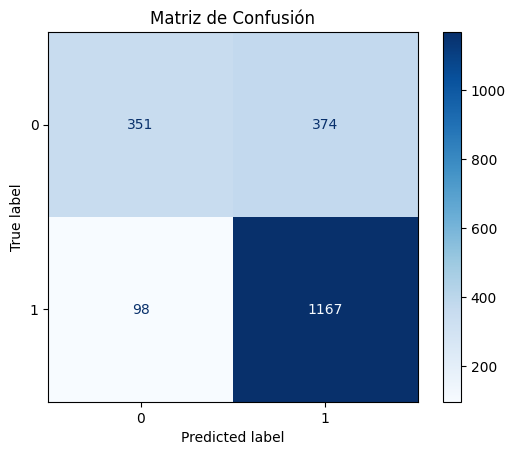

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Crear matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Visualizar
disp.plot(cmap="Blues")
import matplotlib.pyplot as plt
plt.title("Matriz de Confusión")
plt.show()


#**Interpretacion de la Matriz de Confusion**

**Estructura de la Matriz de Confusión**

El eje vertical (True label) representa las etiquetas reales de los datos.
El eje horizontal (Predicted label) representa las etiquetas predichas por el modelo.
Cada celda indica la cantidad de instancias correspondientes a una combinación de etiqueta real y predicha.

#**Valores en la Matriz de Confusión**

Clase 0 (etiqueta real): Versos de una categoría (ej., Martín Fierro).
Clase 1 (etiqueta real): Versos de la otra categoría (ej., Fausto).

**Los valores son los siguientes:**


TP (351): El modelo acertó al predecir versos del Martín Fierro.

FN (374): Errores del modelo, versos del Martín Fierro predichos como si fueran del Fausto.

FP (98): Errores del modelo, versos del Fausto predichos como si fueran del Martín Fierro.

TN (1167): El modelo acertó al predecir versos del Fausto.

#**Interpretación de la Barra Numérica:**

***La barra numérica que aparece al lado del gráfico de la matriz de confusión es una escala de colores que representa la intensidad de los valores en la matriz.***

La barra muestra un gradiente de colores (por ejemplo, de azul claro a azul oscuro), y se usa para visualizar mejor la densidad o cantidad de elementos en cada celda de la matriz.

Color más claro (en este caso, azul claro): Representa valores menores en la matriz de confusión.

Color más oscuro (en este caso, azul oscuro): Representa valores mayores en la matriz de confusión.

***¿Qué significa en el gráfico?***

Las celdas con un color más oscuro indican que hay una mayor cantidad de predicciones en esa categoría (por ejemplo, la celda de True Negatives (1167) es más oscura porque es el valor más alto).

Las celdas con un color más claro indican que hay una menor cantidad de predicciones en esa categoría (por ejemplo, False Positives (98) es más claro porque es un valor menor).

La barra es una referencia visual que ayuda a identificar rápidamente las áreas de la matriz donde el modelo tuvo más aciertos o errores, facilitando la comprensión de la distribución de las predicciones.

**Métricas Derivadas**

Podemos calcular las principales métricas a partir de la matriz de confusión:

Precision (Precisión):

Para la clase 0:
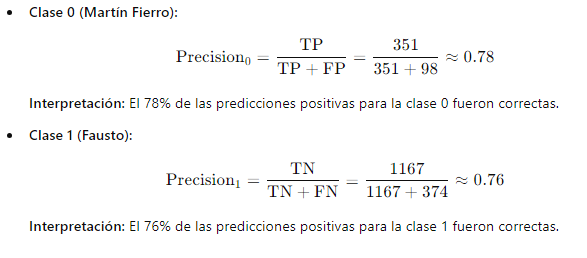

**Interpretación:**

La precisión mide la cantidad de predicciones correctas dentro de lo que se predijo como positivo. El modelo tiene buen desempeño en ambas clases, con una precisión cercana al 76-78%.

**Recall (Sensibilidad):**

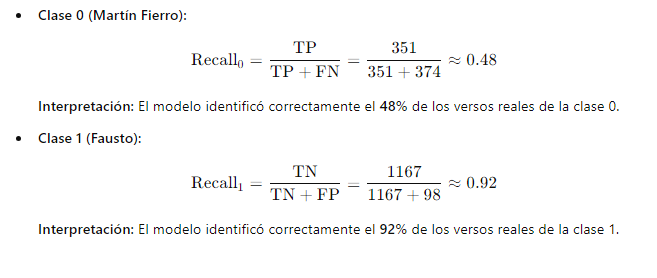

**Interpretación:**

El recall mide cuántos casos positivos reales se detectaron correctamente. La clase 0 tiene un recall bajo (48%), lo que indica que se están perdiendo muchos casos reales de la clase 0. La clase 1 tiene un recall alto (92%), por lo que la mayoría de los casos reales de la clase 1 son bien identificados.

**Accuracy (Exactitud):**

La exactitud general del modelo es:

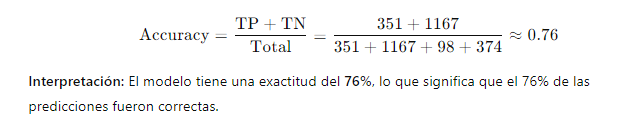



**F1-Score:**

Combina precisión y recall para cada clase. El F1-Score refleja un balance entre estas métricas:

Clase 0: F1-Score ≈ 0.60

Clase 1: F1-Score ≈ 0.83

Esto indica que la clase 1 tiene un rendimiento global significativamente mejor que la clase 0.

**Interpretación General**

El modelo tiene un buen desempeño general con una exactitud del 76%.
La clase 1 (versos Fausto) se clasifica mejor, con alta sensibilidad (92%) y precisión (76%, levemente inferior a la de la clase 0 (78%)) y un balance (F1-Score) muy superior al de la clase 0.

La clase 0 (versos Martín Fierro) presenta problemas:
Un recall del 48% indica que se pierden muchos versos reales de la clase 0, clasificándolos erróneamente como clase 1.

Esto puede deberse a un desequilibrio en las clases o a características compartidas entre versos de ambas clases.

#**Analisis de Mejoras posibles**
Atento a los resultados , estructuras y dimensiones de los textos que intervienen, puedo concluir, con algunas dudas, que se podrian aplicar las siguientes mejoras:

Balancear las clases: de acuerdo a los resultados y al desvalance visualizado y considerando que es un problema de clasificacion, y en base a lo investigado, podria usar técnicas como SMOTE (Synthetic Minority Over-sampling Technique) para equilibrar las instancias de clase 0. En este caso es donde tengo algunas dudas por ejemplo, si al disminuir la dimensionalidad de uno de los textos, no se pierde la interpretacion de los textos.

Ajustar parámetros del modelo: Revisar opciones en la vectorización TF-IDF (por ejemplo, ajustar min_df o max_df) y probar otros clasificadores.

Análisis de errores: Revisar las instancias mal clasificadas (especialmente falsos negativos) para entender por qué el modelo falla.

Agregar más datos: Si es posible, aumentar el tamaño del conjunto de datos para mejorar el aprendizaje del modelo.

#**Reporte de clasificación como gráfico de barras:**

 Compara precisión, recall y F1-Score entre las clases.

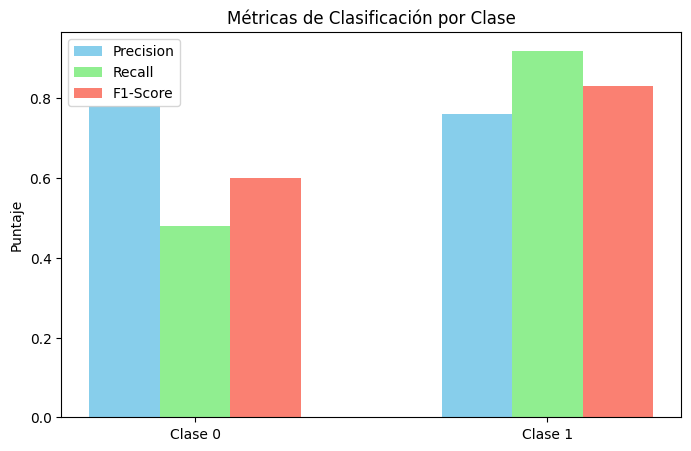

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Métricas del reporte
metrics = {
    "Precision": [0.78, 0.76],
    "Recall": [0.48, 0.92],
    "F1-Score": [0.60, 0.83]
}

# Configurar gráfico
labels = ['Clase 0', 'Clase 1']
x = np.arange(len(labels))
width = 0.2

# Crear barras
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width, metrics['Precision'], width, label='Precision', color='skyblue')
ax.bar(x, metrics['Recall'], width, label='Recall', color='lightgreen')
ax.bar(x + width, metrics['F1-Score'], width, label='F1-Score', color='salmon')

# Configurar detalles
ax.set_ylabel('Puntaje')
ax.set_title('Métricas de Clasificación por Clase')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()


Interpretación

Clase 0 (barra izquierda):

Precisión (barra azul):

Es alta, cercana a 0.78, lo que indica que cuando el modelo predice la Clase 0, acierta en la mayoría de los casos.

Recall (barra verde):

Es bajo, alrededor de 0.48, lo que significa que el modelo no detecta correctamente muchos casos reales de la Clase 0.

F1-Score (barra roja):

Es moderado, aproximadamente 0.60, porque combina precisión alta con un recall bajo.

Conclusión:

La Clase 0 tiene problemas para ser detectada correctamente, especialmente en la sensibilidad.

Clase 1 (barra derecha):

Precisión (barra azul):

Es alta, alrededor de 0.76, lo que indica que las predicciones para la Clase 1 son muy confiables.

Recall (barra verde):

Es muy alto, cerca de 0.92, lo que significa que el modelo detecta casi todos los casos reales de la Clase 1.

F1-Score (barra roja):

Es alto, cerca de 0.83, lo que refleja un buen equilibrio entre precisión y recall.

Conclusión:

El modelo clasifica muy bien la Clase 1, logrando tanto alta precisión como alta sensibilidad.

Resumen General

El modelo tiene mejor desempeño en la Clase 1 (mayor recall y F1-Score), lo que indica que identifica correctamente la mayoría de los casos de esta clase.

La Clase 0 tiene dificultades, especialmente en el recall, lo que sugiere que muchos casos reales de esta clase se están clasificando incorrectamente como Clase 1.

1. Distribución de las etiquetas antes del balanceo
Este gráfico evidenciará el desbalance de clases en el dataset original.

In [ ]:
print(data['label'].value_counts())


label
1    4314
0    2317
Name: count, dtype: int64


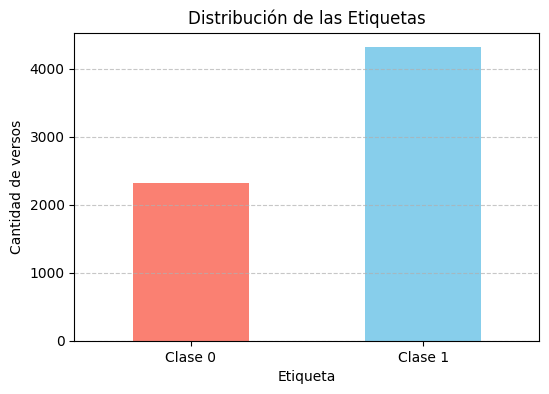

In [ ]:
import matplotlib.pyplot as plt

# Conteo de etiquetas (sin ordenar)
label_counts = data['label'].value_counts()

# Invertir el orden
label_counts = label_counts[::-1]

# Gráfico de barras
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('Distribución de las Etiquetas')
plt.xlabel('Etiqueta')
plt.ylabel('Cantidad de versos')
plt.xticks([0, 1], labels=['Clase 0', 'Clase 1'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Distribución de las etiquetas

Interpretación:

El gráfico muestra un claro desbalance entre las clases.

La Clase 1 (representada en azul) tiene significativamente más muestras que la Clase 0 (en rojo).

Esto puede impactar negativamente en el rendimiento del modelo, ya que los algoritmos tienden a favorecer la clase mayoritaria.

Conclusión:

El modelo podría estar sesgado hacia la Clase 1, afectando métricas como recall y F1-score para la Clase 0.

Curva ROC y AUC
La Curva ROC y su área (AUC) ilustrarán la capacidad del modelo para discriminar entre clases.

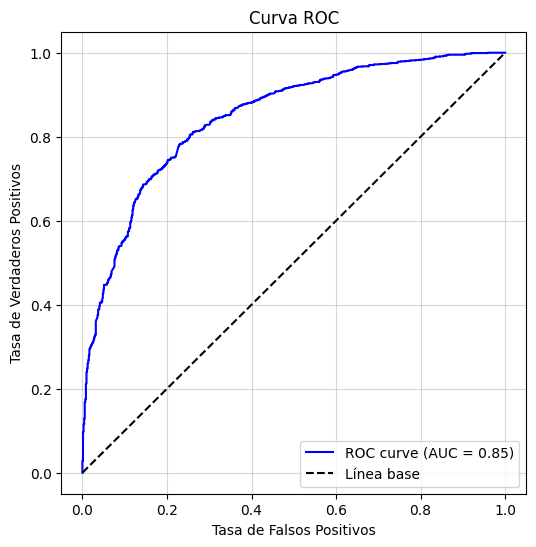

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilidades predichas para la clase positiva
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Gráfico
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Línea base')
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend(loc='lower right')
plt.grid(alpha=0.5)
plt.show()


#**Curva ROC y AUC**

**Interpretación:**

Ejes:

El eje X representa la Tasa de Falsos Positivos (FPR).

El eje Y representa la Tasa de Verdaderos Positivos (TPR), también conocida como recall o sensibilidad.

La gráfica muestra cómo la Tasa de Verdaderos Positivos evoluciona en función de la Tasa de Falsos Positivos al variar el umbral de decisión.

La curva ROC indica un desempeño razonable del modelo para distinguir entre clases, con un AUC de 0.85, que es bastante bueno. Sin embargo, aún hay espacio para mejoras, especialmente en reducir falsos negativos y falsos positivos.

**Conclusión:**

El modelo tiene un buen desempeño general, ya que la curva ROC se encuentra alejada de la diagonal aleatoria y el AUC es 0.85, lo que lo clasifica como un modelo confiable.

La capacidad del modelo para distinguir entre clases positivas y negativas es alta, aunque no perfecta.

Dependiendo del problema, podría ajustar el umbral de decisión  para maximizar alguna métrica específica, como recall, precisión, o un equilibrio entre ambas.

#**Importancia de palabras según TF-IDF**

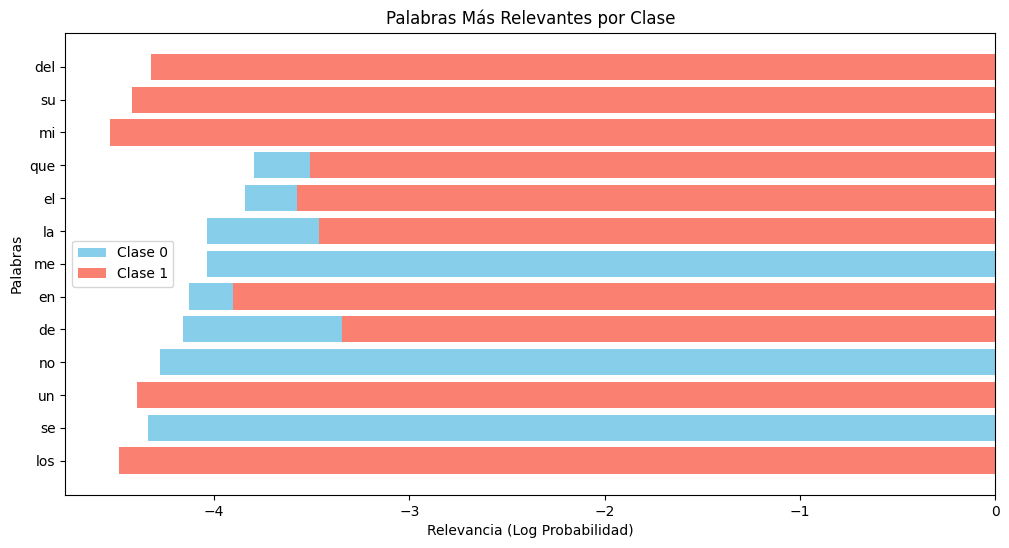

In [ ]:
import numpy as np
import pandas as pd

# Obtener nombres de las palabras
feature_names = vectorizer.get_feature_names_out()

# Coeficientes del modelo Naive Bayes
coefficients = model.feature_log_prob_

# Seleccionar las palabras más relevantes
top_n = 10
top_words_class_0 = np.argsort(coefficients[0, :])[-top_n:]
top_words_class_1 = np.argsort(coefficients[1, :])[-top_n:]

# Gráfico
plt.figure(figsize=(12, 6))

plt.barh([feature_names[i] for i in top_words_class_0], coefficients[0, top_words_class_0], color='skyblue', label='Clase 0')
plt.barh([feature_names[i] for i in top_words_class_1], coefficients[1, top_words_class_1], color='salmon', label='Clase 1')
plt.title('Palabras Más Relevantes por Clase')
plt.xlabel('Relevancia (Log Probabilidad)')
plt.ylabel('Palabras')
plt.legend()
plt.show()


#**Palabras más relevantes por clase**

**Interpretación:**

Las palabras más influyentes para cada clase (según TF-IDF) son mayoritariamente de alta frecuencia y poca especificidad ("del", "que", "los", etc.). Esto sugiere que el modelo podría estar capturando patrones generales en lugar de características distintivas.

**Conclusión:**

El uso de palabras con poco contexto puede estar limitando el rendimiento. Optimizar la extracción de características (por ejemplo, mediante el ajuste de TF-IDF o eliminando palabras comunes) podría mejorar la precisión.



Comparación de métricas (Precisión, Recall, F1-Score)

Compararemos las métricas clave entre las clases para ilustrar el desempeño del modelo.

<Figure size 800x600 with 0 Axes>

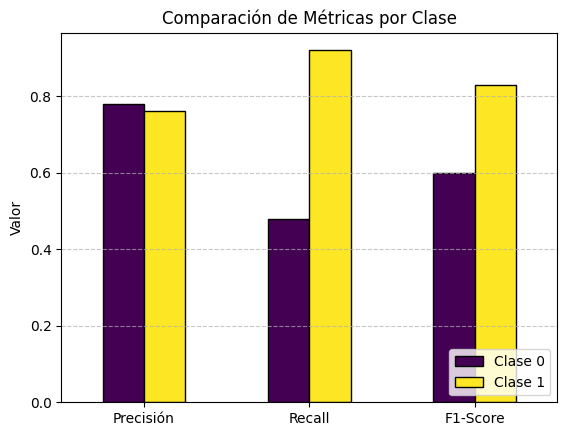

In [ ]:
import seaborn as sns

# Datos para las métricas
metrics = {
    'Clase 0': [0.78, 0.48, 0.60],
    'Clase 1': [0.76, 0.92, 0.83]
}
metrics_df = pd.DataFrame(metrics, index=['Precisión', 'Recall', 'F1-Score'])

# Gráfico
plt.figure(figsize=(8, 6))
metrics_df.plot(kind='bar', colormap='viridis', edgecolor='black')
plt.title('Comparación de Métricas por Clase')
plt.ylabel('Valor')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()


#**Comparación de métricas**

**Interpretación:**

La Clase 1 tiene un desempeño notablemente superior en recall y F1-score en comparación con la Clase 0.

Sin embargo, la precisión de ambas clases es similar, con un valor mayor de la clase 0, lo que indica que el modelo está moderadamente equilibrado, aunque aún podría ser más robusto para ambas clases.

**Conclusión:**

## Es necesario balancear mejor las métricas entre clases para garantizar un modelo más equitativo.

#**Recomendaciones**

**Basándonos en los gráficos y análisis, serian importantes realizar las siguientes acciones:**


**Balancear las clases con sobremuestreo (SMOTE) o submuestreo:**

Esto corregirá el desbalance observado en el gráfico de distribución de etiquetas, ayudando al modelo a tratar ambas clases de manera equitativa.

**Impacto:**

Mejora directa en las métricas de la Clase 0 (recall y F1-score).

**Implementación:**

Relativamente sencilla con herramientas como imbalanced-learn.

**Optimizar la representación de texto con TF-IDF:**

Ajustar los parámetros del vectorizador, como eliminar palabras comunes (stopwords) o limitar la frecuencia mínima y máxima de palabras.

***Impacto:**
*

Mejora en la capacidad del modelo para capturar características distintivas, aumentando precisión y recall.

**Implementación:**
Fácil de ajustar y probar iterativamente.

**Tuning de hiperparámetros del modelo:**


Ajustar parámetros del clasificador (por ejemplo, la regularización en Naive Bayes) mediante una búsqueda en cuadrícula (Grid Search).

***Impacto:***

Mejora generalizada en las métricas (ROC-AUC, precisión, recall, etc.).

**Implementación:**

Puede requerir algo más de tiempo, pero es de alto impacto.

#*Justificación de las mejoras*

**Balanceo de clases:**

Es una prioridad debido al claro desbalance mostrado en el primer gráfico. Esto asegurará que el modelo no favorezca la clase mayoritaria, mejorando el desempeño general.

Optimización de TF-IDF:

Los gráficos de palabras más relevantes indican que se están utilizando términos poco específicos. Ajustar TF-IDF incrementará la discriminación de las características relevantes, lo cual es crítico para mejorar la precisión y recall.

Hiperparámetros (opcional):

Aunque de alto impacto, puede ser más adecuado implementarlo como una mejora a mediano plazo después de ajustar los dos puntos anteriores.


#**Implementare primero las dos mejoras: balanceo de clases y optimización de TF-IDF**


1. Balanceo de Clases

Método seleccionado: SMOTE (Synthetic Minority Over-sampling Technique)
Este método generará nuevas instancias sintéticas para la clase minoritaria, reduciendo el desbalance observado.

Pasos:
Utilizar la biblioteca imbalanced-learn.
Sobremuestrear la Clase 1 para igualar la cantidad de muestras a la Clase 0.
Entrenar nuevamente el modelo con el conjunto balanceado.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Separar características y etiquetas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE para balancear
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Entrenar modelo con datos balanceados
modelo = MultinomialNB()
modelo.fit(X_resampled, y_resampled)

# Evaluar en datos de prueba
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.64      0.76      0.69       474
           1       0.85      0.76      0.80       853

    accuracy                           0.76      1327
   macro avg       0.74      0.76      0.75      1327
weighted avg       0.77      0.76      0.76      1327



Concluido el ajuste realizando, el primero de los dos previstos, o sea, Implementar el Balanceo de clases, oy a hacer una presentacion y comparacion de resultados.

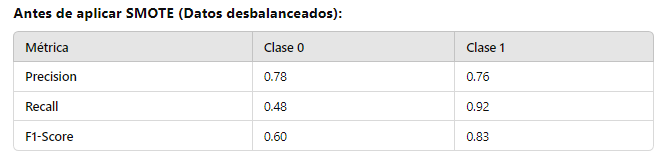

Problema detectado:

Clase 0: El recall bajo (48%) indica que el modelo no está identificando bien los casos positivos de la clase 0.

Clase 1: El recall alto (92%) demuestra que el modelo está favoreciendo la clase mayoritaria (Clase 1).

Conclusión preliminar:

El modelo está sesgado hacia la clase mayoritaria (Clase 1), ya que no logra capturar bien los ejemplos de la Clase 0 (recall bajo).

Por ese motivo se  decide aplicar la herramienta SMOTE para el Balanceo de Clases, con los siguientes resultados obtenidos

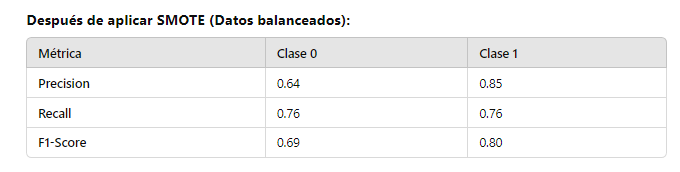


##*Que se Observa:*

**El recall de la Clase 0 pasó de 0.48 a 0.76.** Esto significa que el modelo ahora detecta muchos más casos positivos de la Clase 0.

**La precisión** de la Clase 0 bajó de 0.78 a 0.64, lo cual es un trade-off común: al aumentar la detección de positivos, también crecen los falsos positivos.

La Clase 1 se mantiene sólida con métricas aún altas, aunque con un pequeño sacrificio en **precisión.**

**Accuracy:** Se mantiene estable en 76%, lo cual indica que el modelo no perdió rendimiento general a pesar de los cambios.

#**Conclusión final:**

**Resultados positivos:**

Aplicar **SMOTE** ha logrado mejorar la detección de la Clase 0 **(recall)**, lo cual era un problema importante en el modelo original. Ahora el modelo balancea mejor el rendimiento entre ambas clases.

**¿Qué hacer ahora?:**

Se puede intentar mejorar mas el modelo, para ello hay dos ajustes (entre otros), simples para implementar:

Ajustar el umbral de decisión para encontrar un mejor equilibrio entre precision y recall.

Optimización de TF-IDF: Ajustar los parámetros del vectorizador, como eliminar palabras comunes (stopwords) o limitar la frecuencia mínima y máxima de palabras



#**Conclusion**

Al aplicar SMOTE, se logro corregir el sesgo hacia la clase mayoritaria, mejorando el recall de la Clase 0 de un 48% a un 76%.

Aunque hubo una ligera reducción en la precisión, el modelo ahora es más equilibrado y justo para ambas clases.

Esto muestra la importancia de técnicas de balanceo de clases en problemas de clasificación desbalanceada.

Bibliografia y puntos de Inspiracion


Prompt empleado en chatgpt: " necesito una guia general, paso por paso para desarrollar un notebook para el siguiente tema :"TEMA 2 CLASIFICACIÓN
Determinar si un verso (o estrofa) es del Martín Fierro o del Fausto (Estanislao Lopez)"

"Introducción al Aprendizaje Automático" (Aurélien Géron) – Cubre tanto los fundamentos del aprendizaje automático como técnicas específicas para clasificación.

"Aprendizaje Automático con Scikit-Learn y TensorFlow" (Raúl González Duque) – Enfoque práctico y sencillo para aprender a trabajar con herramientas de clasificación, con ejemplos detallados.

Videos

"Introducción al procesamiento de lenguaje natural (NLP) con Python" (Canal: Data Science en Español)

Descripción: Introducción a técnicas básicas de procesamiento de lenguaje natural.

"Clasificación de Textos con Machine Learning" (Canal: Machine Learning en Español)

Descripción: Tutorial paso a paso sobre cómo clasificar textos utilizando TF-IDF y SVM.

"Clasificación de texto con Deep Learning y BERT" (Canal: Deep Learning en Español)

Descripción: Explicación de cómo utilizar BERT para la clasificación de textos en tareas avanzadas de NLP.